# Importation des librairies nécessaires

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# SCIKIT-LEARN: SELECTION DE VARIABLES

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.ensemble import RandomForestClassifier

# SCIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # Encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # Normalisation des variables numériques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer # Imputation
from sklearn.impute import KNNImputer 
from sklearn_pandas import DataFrameMapper
from sklearn.decomposition import PCA

# SCIKIT-LEARN: MODELES
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, ElasticNet
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

# SMOTE
from imblearn.over_sampling import SMOTE

# SCIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # Séparer en données train et test
from sklearn.model_selection import cross_val_score # Validation croisée pour comparison entre modèles
from sklearn.model_selection import validation_curve # Courbe de validation : visulaisr des scores lors du choix d'un hyper-paramètre
from sklearn.model_selection import GridSearchCV # Tester plusieurs hyper-paramètres
from sklearn.model_selection import learning_curve # Courbe d'apprentissage : visualisation des scores du train et du validation sets en fonction des quanitiés des données
import optuna
 
## EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# SCHIKIT-LEARN: PIPELINE AND TRANSFORMATEURll
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

# YELLOWBRICK
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import ValidationCurve

# Importation des modules

In [2]:
# Configuration du chemin d'accès
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Importations des modules nécessaires
import data_loader
import preprocessing
import modeling
import evaluation
import cleaning

# Chargement des données

In [3]:
data_path = '../data/smoking_driking_dataset_Ver01.csv'
target_column = 'SMK_stat_type_cd' 
output_path = '../data/balanced_smoking_drinking_dataset.csv'

# Équilibrer le dataset
df_balanced = data_loader.balance_dataset(data_path, target_column, output_path)

Distribution des classes dans le dataset équilibré :
SMK_stat_type_cd
1.0    174951
2.0    174951
3.0    174951
Name: count, dtype: int64


In [35]:
# def reduce_dataset(data_path, target_column, output_path, train_size=100000, random_state=42):
#     """
#     Réduit le dataset à un nombre spécifié de lignes tout en conservant les proportions des classes.
    
#     Parameters:
#     - data_path (str): Le chemin du fichier CSV à charger.
#     - target_column (str): Le nom de la colonne cible pour le stratified sampling.
#     - output_path (str): Le chemin du fichier CSV où sauvegarder le dataset réduit.
#     - train_size (int): Le nombre total de lignes du dataset réduit (par défaut 100 000).
#     - random_state (int): La graine aléatoire pour la reproductibilité (par défaut 42).
#     """
#     # Charger les données
#     df = pd.read_csv(data_path)
    
#     # Calculer la taille relative de l'échantillon
#     relative_train_size = train_size / len(df)
    
#     # Réduire le dataset à la taille spécifiée en utilisant un échantillonnage stratifié
#     df_reduced, _ = train_test_split(df, stratify=df[target_column], train_size=relative_train_size, random_state=random_state)
    
#     # Sauvegarder le nouveau dataset
#     df_reduced.to_csv(output_path, index=False)
    
#     # Vérifier la distribution des classes dans le nouvel ensemble de données
#     distribution = df_reduced[target_column].value_counts()
#     print("Distribution des classes dans le dataset réduit :")
#     print(distribution)
    
#     return df_reduced

In [36]:
# # Réduire le dataset qui a été équilibré en amont
# data_path = '../data/balanced_smoking_drinking_dataset.csv'
# output_path = '../data/reduced_balanced_smoking_drinking_dataset.csv'
# df_reduced = reduce_dataset(data_path, target_column, output_path, train_size=200000)

# Nettoyage des données

## Type des variables

In [4]:
intToFloat = ['age', 'height', 'weight']
floatToInt = ['hear_left', 'hear_right', 'urine_protein', 'SMK_stat_type_cd']

In [5]:
cleaning.convertType(df_balanced, intToFloat, floatToInt)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Female,70.0,155.0,40.0,61.0,0.9,0.9,1,1,124.0,...,141.0,63.0,13.2,2,0.8,30.0,9.0,24.0,1,N
1,Male,75.0,160.0,65.0,82.0,0.5,0.5,2,2,177.0,...,88.0,116.0,13.3,4,0.9,18.0,28.0,29.0,1,N
2,Female,45.0,150.0,55.0,81.0,1.0,1.0,1,1,175.0,...,201.0,104.0,13.8,1,1.0,29.0,25.0,18.0,1,N
3,Female,70.0,155.0,65.0,85.0,0.8,0.7,1,1,166.0,...,147.0,169.0,11.4,1,0.9,28.0,24.0,20.0,1,Y
4,Female,45.0,155.0,55.0,75.5,0.7,0.9,1,1,95.0,...,123.0,176.0,12.7,1,0.8,23.0,23.0,29.0,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524848,Male,35.0,170.0,65.0,80.2,0.7,0.6,1,1,120.0,...,55.0,51.0,14.1,1,0.5,24.0,31.0,47.0,3,Y
524849,Male,40.0,175.0,60.0,74.0,1.2,0.8,1,1,122.0,...,109.0,125.0,14.8,1,1.2,22.0,17.0,69.0,3,Y
524850,Male,30.0,165.0,75.0,84.0,0.9,1.2,1,1,126.0,...,139.0,240.0,16.5,1,0.5,37.0,57.0,123.0,3,Y
524851,Male,30.0,165.0,70.0,83.5,1.2,1.0,1,1,160.0,...,71.0,51.0,15.6,1,0.8,23.0,25.0,75.0,3,Y


In [6]:
df_balanced.dtypes

sex                  object
age                 float64
height              float64
weight              float64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd      int64
DRK_YN               object
dtype: object

In [7]:
cont_features = df_balanced.select_dtypes(include=['float64']).columns
cat_features = df_balanced.select_dtypes(include=['object', 'int64']).columns
cat_features = cat_features.drop(['SMK_stat_type_cd', 'DRK_YN'])

In [8]:
cont_features, cat_features

(Index(['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
        'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
        'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST',
        'SGOT_ALT', 'gamma_GTP'],
       dtype='object'),
 Index(['sex', 'hear_left', 'hear_right', 'urine_protein'], dtype='object'))

# Séparation données train / test

In [9]:
X = df_balanced.drop(columns=['SMK_stat_type_cd', 'DRK_YN'])
y = df_balanced['SMK_stat_type_cd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
y_train.value_counts(), y_test.value_counts()

(SMK_stat_type_cd
 1    139961
 2    139961
 3    139960
 Name: count, dtype: int64,
 SMK_stat_type_cd
 3    34991
 1    34990
 2    34990
 Name: count, dtype: int64)

# Prétraitement

In [11]:
def preprocess_data_without_selecting(X_train, X_test, cont_features, cat_features):
    """"
    Renvoie les données prétraitées pour l'entraînement et le test, ainsi que le preprocessor utilisé.
    """
    
    # Preprocess numerical features
    cont_preprocessor = make_pipeline(StandardScaler())
    
    # Preprocess categorical features
    cat_preprocessor = make_pipeline(OrdinalEncoder())
    
    preprocessor = make_column_transformer((cont_preprocessor, cont_features),
                                           (cat_preprocessor, cat_features),
                                           remainder='drop')
    
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)
    
    return X_train_prep, X_test_prep, preprocessor

In [12]:
X_train, X_test, preprocessor = preprocess_data_without_selecting(X_train, X_test, cont_features, cat_features)

### PCA

In [13]:
pca = PCA(n_components=0.95)  # Conservation de 95% de la variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Afficher le nombre de composants retenus et la variance expliquée
print(f"Nombre de composants retenus : {pca.n_components_}")
print(f"Variance expliquée par les composants : {pca.explained_variance_ratio_}")

Nombre de composants retenus : 15
Variance expliquée par les composants : [0.19710873 0.10637799 0.10191363 0.08687649 0.06943571 0.06072852
 0.05357029 0.05098142 0.04679907 0.03930929 0.0388133  0.03494847
 0.02949146 0.02383361 0.01900173]


In [14]:
# Noms des caractéristiques d'origine
feature_names = X.columns

# Coefficients des composantes principales
pca_components = pca.components_

# Créer un DataFrame pour afficher les coefficients
pca_df = pd.DataFrame(data=pca_components, columns=feature_names)
pca_df.index = [f'PC{i+1}' for i in range(pca_df.shape[0])]

# Afficher les coefficients des premières composantes principales
pca_df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
PC1,-0.055243,0.317915,0.423819,0.354133,0.058150,0.057766,0.244959,0.267620,0.137346,0.126029,...,0.265014,0.341333,0.109875,0.150523,0.255891,0.230921,0.151425,-0.002669,-0.002552,0.016171
PC2,0.470572,-0.410103,-0.208890,0.022907,-0.253276,-0.250406,0.350915,0.281735,0.215874,0.202355,...,0.127464,-0.186852,-0.056224,0.161613,0.111772,0.154523,-0.091959,0.015916,0.015641,0.025817
PC3,-0.164128,-0.000210,-0.031643,-0.091778,0.079582,0.076973,-0.126880,-0.062818,-0.153144,0.662102,...,0.026636,0.070507,-0.052101,-0.064774,-0.035095,-0.050791,-0.031547,-0.008534,-0.007986,-0.021449
PC4,-0.124421,-0.055264,-0.116396,-0.146306,0.045405,0.043600,-0.284784,-0.261343,-0.032030,-0.009591,...,0.025690,-0.042702,-0.078578,0.591732,0.537835,0.348842,-0.034478,-0.004347,-0.004152,-0.001248
PC5,-0.164348,-0.015069,-0.098705,-0.188350,0.357584,0.355289,0.420952,0.469816,-0.153838,-0.047032,...,-0.213389,-0.004199,-0.115777,0.072832,0.021372,0.074917,-0.028335,-0.007353,-0.006770,-0.008338


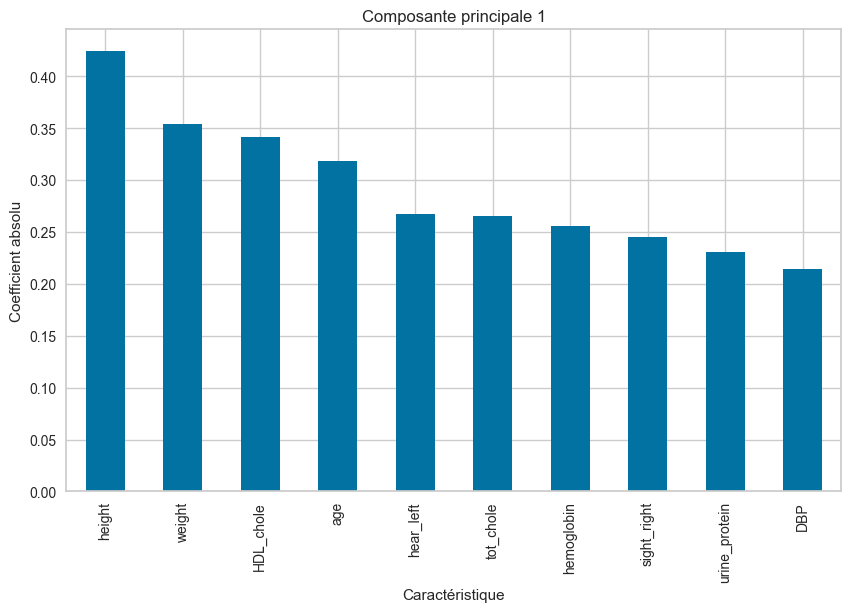

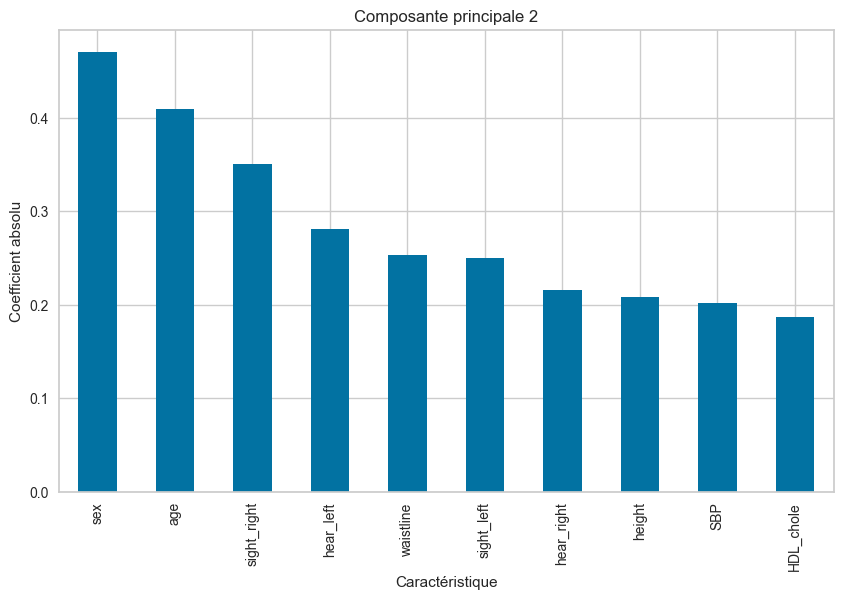

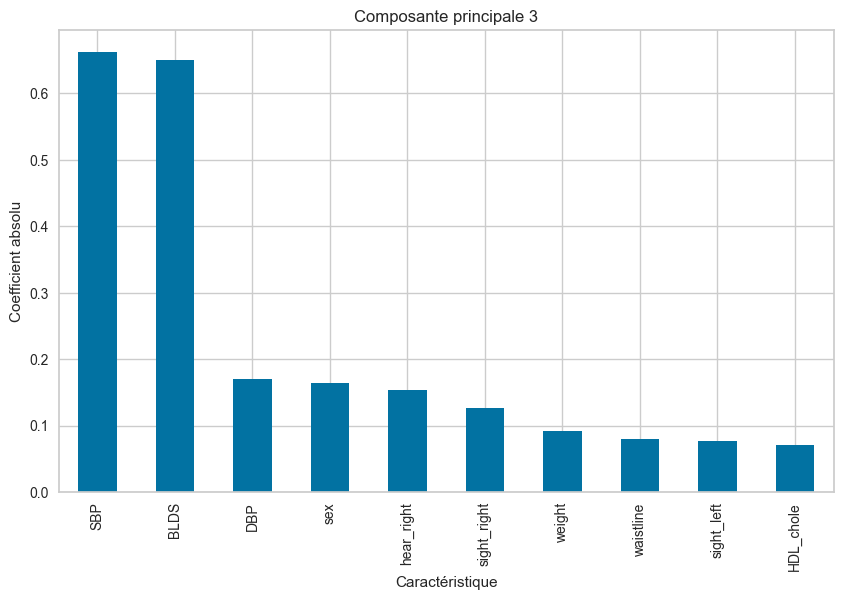

In [15]:
def plot_pca_components(pca_df, component_num, num_features=10):
    component = pca_df.iloc[component_num - 1]
    sorted_component = component.abs().sort_values(ascending=False).head(num_features)
    plt.figure(figsize=(10, 6))
    sorted_component.plot(kind='bar')
    plt.title(f'Composante principale {component_num}')
    plt.ylabel('Coefficient absolu')
    plt.xlabel('Caractéristique')
    plt.show()

# Tracer les coefficients des caractéristiques pour les trois premières composantes principales
for i in range(1, 4):
    plot_pca_components(pca_df, i)


# Modélisation : KNN

## Entraînement et prédiction 

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)

# Entraîner le modèle KNN sur les données d'entraînement transformées
knn.fit(X_train_pca, y_train)

# Faire des prédictions sur les données de test transformées
y_pred = knn.predict(X_test_pca)

In [53]:
# Faire des prédictions sur les données de train transformées
y_pred_train = knn.predict(X_train_pca)

## Evaluation - train

In [20]:
def plot_confusion_matrix(y_true, y_pred, classes, cmap='Blues', figsize=(10, 7)):
    """
    Plots a confusion matrix using matplotlib.
    
    Parameters:
    y_true : array-like of shape (n_samples,)
        True labels.
    y_pred : array-like of shape (n_samples,)
        Predicted labels.
    classes : array-like of shape (n_classes,)
        List of class labels.
    cmap : str, default='Blues'
        Colormap for the heatmap.
    figsize : tuple, default=(10, 7)
        Figure size.
    """
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    
    # Créer une figure et un axe
    fig, ax = plt.subplots(figsize=figsize)
    
    # Créer une heatmap
    cax = ax.matshow(cm, cmap=cmap)
    
    # Ajouter une barre de couleur
    fig.colorbar(cax)
    
    # Annoter la heatmap avec les valeurs de la matrice de confusion
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black')
    
    # Définir les labels des axes
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticklabels(classes)
    
    # Définir les labels des axes et le titre
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    
    # Afficher la heatmap
    plt.show()

In [18]:
def evaluate_model_multiclass(y_true, y_pred, class_labels):
    """
    Evaluate a multi-class classification model using confusion matrix, classification metrics, 
    and ROC AUC.

    Args:
        y_true (array): True class labels.
        y_pred (array): Predicted class labels.
        class_labels (array): List of class labels.
    """
    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred, classes=class_labels)

    # Calculate classification metrics
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Display classification metrics
    print("*** Classification Metrics ***")
    print("F1 Score =", f1)
    print("******************************")

    # Binarize the output
    y_onehot_test = label_binarize(y_true, classes=class_labels)
    y_score = label_binarize(y_pred, classes=class_labels)

    # ROC AUC for multi-class classification
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(len(class_labels)):
        fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        plt.plot(fpr[i], tpr[i], label='Class %d (AUC=%0.3f)' % (i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Multi-class ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    # Print AUC scores for each class
    print("AUC scores for each class:", roc_auc)

    # Calculate micro-average ROC AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot micro-average ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (AUC = %0.3f)' % roc_auc["micro"], color='darkorange')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Micro-averaged ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

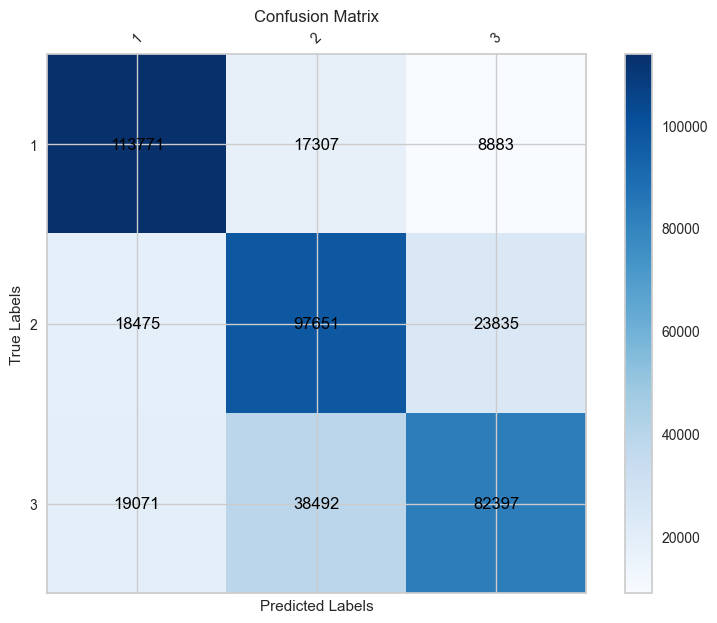

*** Classification Metrics ***
F1 Score = 0.6976241162570653
******************************


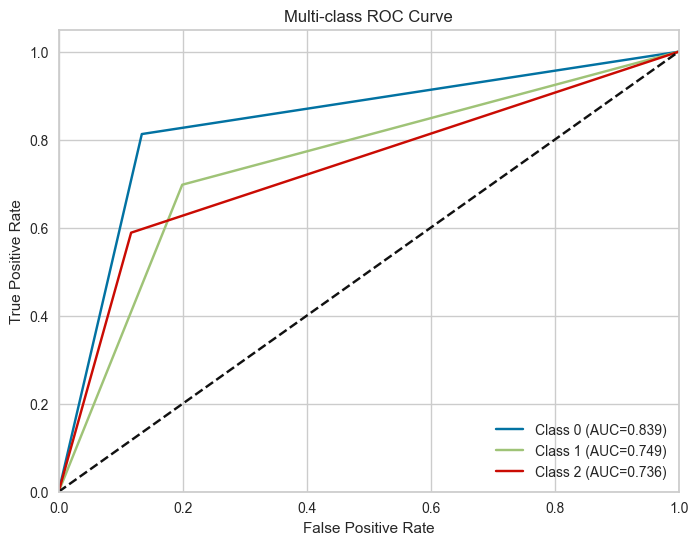

AUC scores for each class: {0: 0.839372871495093, 1: 0.7491815589014355, 2: 0.7359178225298662}


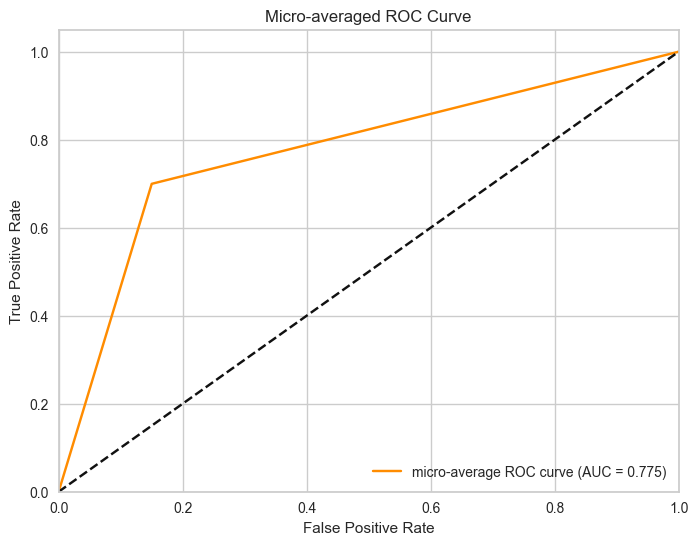

In [54]:
# Evaluer le modèle KNN sur les données de train
evaluate_model_multiclass(y_train, y_pred_train, knn.classes_)

## Evaluation - test

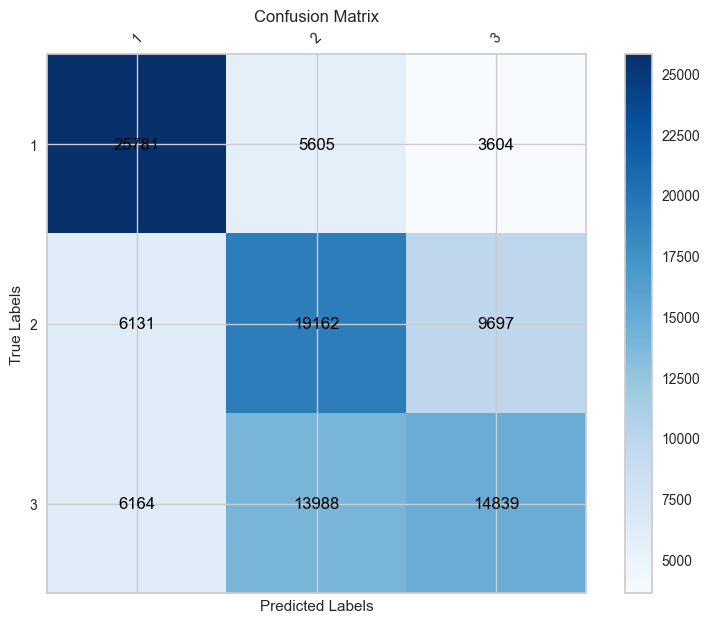

*** Classification Metrics ***
F1 Score = 0.565157523586021
******************************


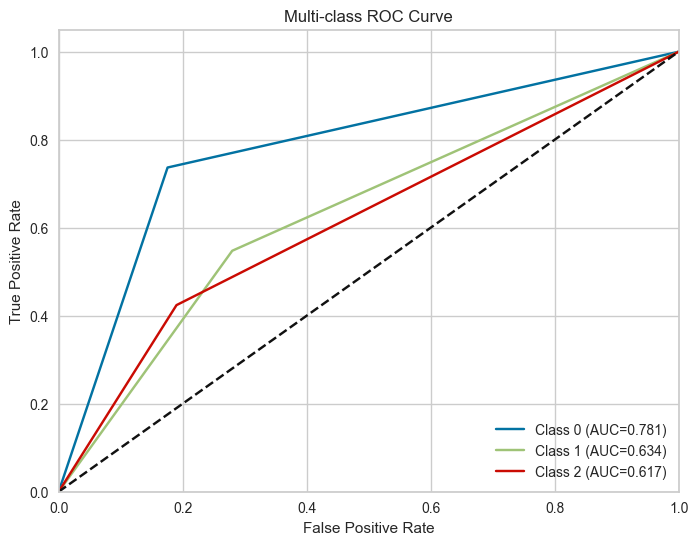

AUC scores for each class: {0: 0.7805599863571347, 1: 0.6338330949985245, 2: 0.6170059434055754}


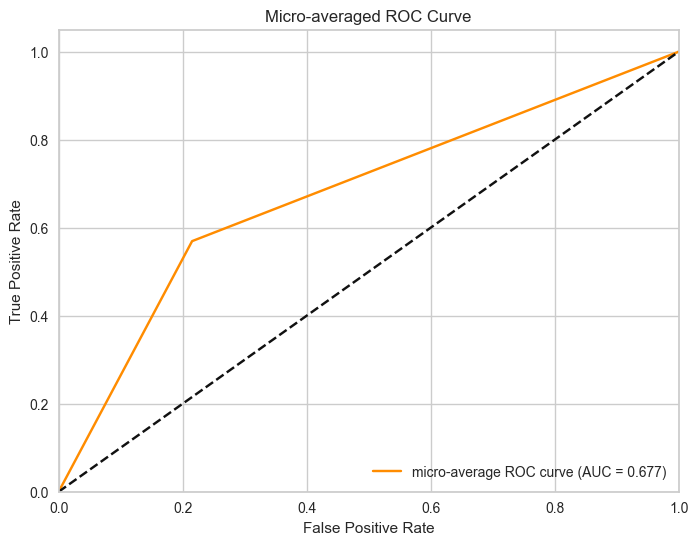

In [52]:
class_labels = np.unique(y) 
evaluate_model_multiclass(y_test, y_pred, class_labels)

In [26]:
# function to plot learning curve
def plot_learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Plot the learning curve for a model.

    Args:
        model: Trained model.
        X: Features.
        y: Target.
        cv: Number of cross-validation folds.
        train_sizes: Array of training set sizes.
    """
    # Create the learning curve visualizer
    sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring='f1_weighted', return_times=True
    )

    # Calculate mean and standard deviation for training set scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.fill_between(sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

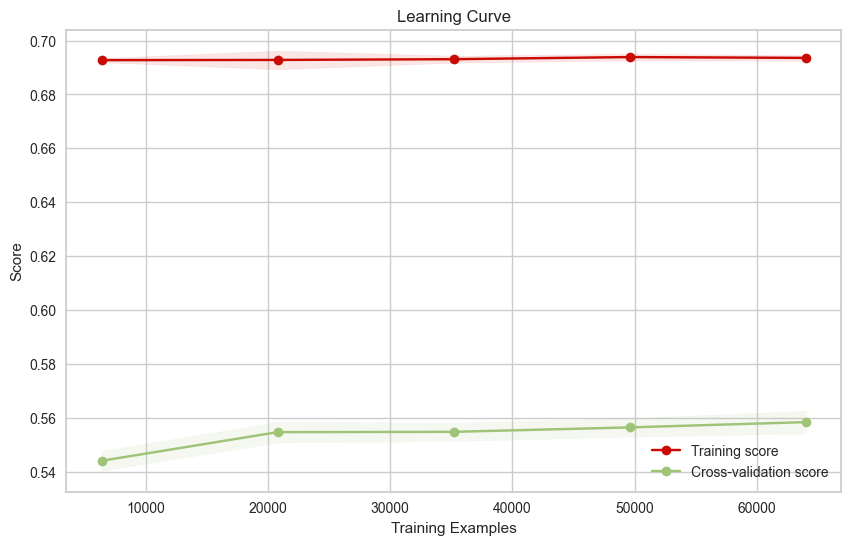

In [55]:
plot_learning_curve(knn, X_train_pca, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))

### Optimisation des hyper paramètres

In [55]:
# Use optuna to optimize hyperparameter k for KNN
def objective(trial):
    # Define the search space
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 20)
    }

    # Create the model
    model = KNeighborsClassifier(**params)

    # Calculate the cross-validation score
    score = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='f1_weighted').mean()

    return score

In [58]:
# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Get the best trial
best_trial = study.best_trial

# Print the best trial
print('Best trial:')
print('  Value: ', best_trial.value)

print('  Params: ')
for key, value in best_trial.params.items():
    print(f'    {key}: {value}')

[I 2024-06-14 20:04:59,878] A new study created in memory with name: no-name-ff8708ab-4f76-4ab6-ba31-bfd085123b04
[I 2024-06-14 21:10:18,472] Trial 0 finished with value: 0.6049400615875298 and parameters: {'n_neighbors': 14}. Best is trial 0 with value: 0.6049400615875298.
[I 2024-06-14 22:08:46,845] Trial 1 finished with value: 0.6128741619066986 and parameters: {'n_neighbors': 19}. Best is trial 1 with value: 0.6128741619066986.
[I 2024-06-14 22:41:21,041] Trial 2 finished with value: 0.5346214141443493 and parameters: {'n_neighbors': 3}. Best is trial 1 with value: 0.6128741619066986.
[I 2024-06-14 23:05:51,541] Trial 3 finished with value: 0.5187151065955355 and parameters: {'n_neighbors': 1}. Best is trial 1 with value: 0.6128741619066986.
[I 2024-06-14 23:48:36,673] Trial 4 finished with value: 0.6088952446129505 and parameters: {'n_neighbors': 16}. Best is trial 1 with value: 0.6128741619066986.
[I 2024-06-15 00:29:59,314] Trial 5 finished with value: 0.613444548391299 and para

### Réévaluation avec k optimisé

In [17]:
# Train the model with the best hyperparameters
# best_params = best_trial.params
# knn_best = KNeighborsClassifier(**best_params)
best_params = {'n_neighbors': 20}
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train_pca, y_train)

# Make predictions on the train set
y_pred_train_best = knn_best.predict(X_train_pca)

*** Train Set Evaluation ***


NameError: name 'evaluate_model_multiclass' is not defined

*** Train Set Evaluation ***


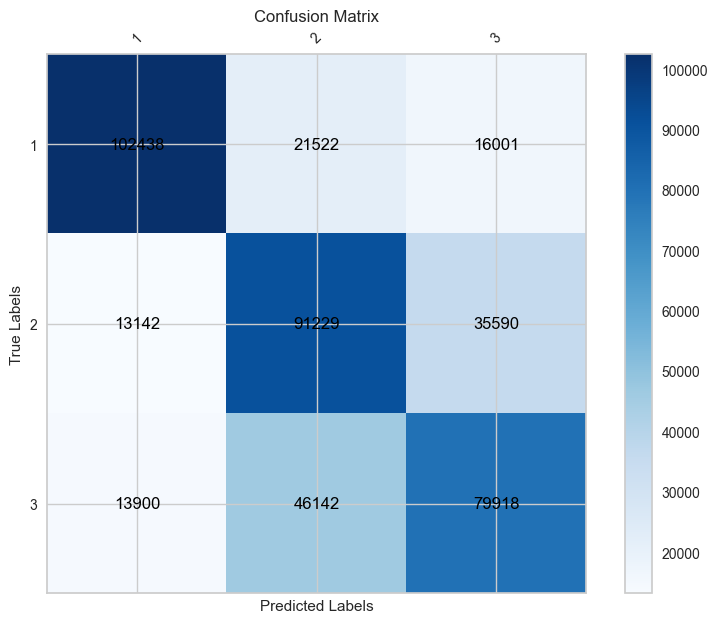

*** Classification Metrics ***
F1 Score = 0.6532273446240335
******************************


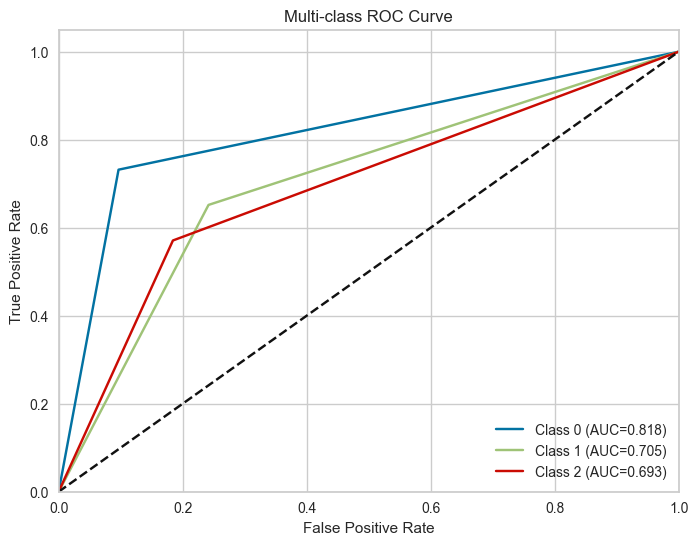

AUC scores for each class: {0: 0.8176490297193002, 1: 0.7050459740117891, 2: 0.6933505441015773}


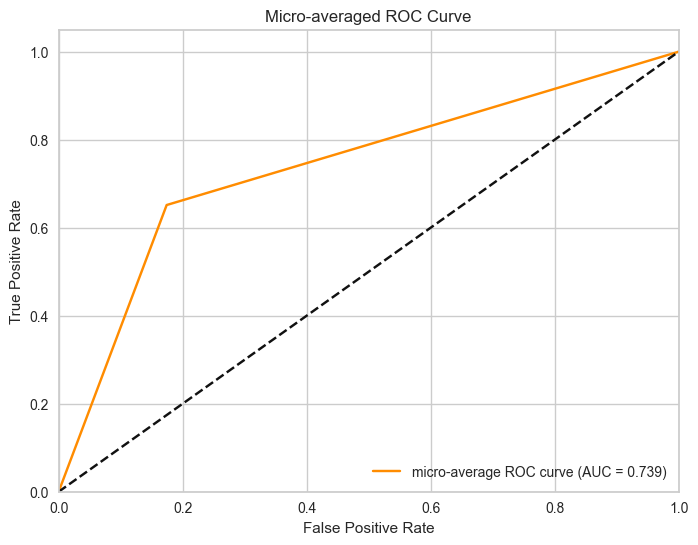

In [21]:
# Evaluate the model on the train set
print("*** Train Set Evaluation ***")
evaluate_model_multiclass(y_train, y_pred_train_best, knn_best.classes_)

In [22]:
# Make predictions on the test set
y_pred_best = knn_best.predict(X_test_pca)

*** Test Set Evaluation ***


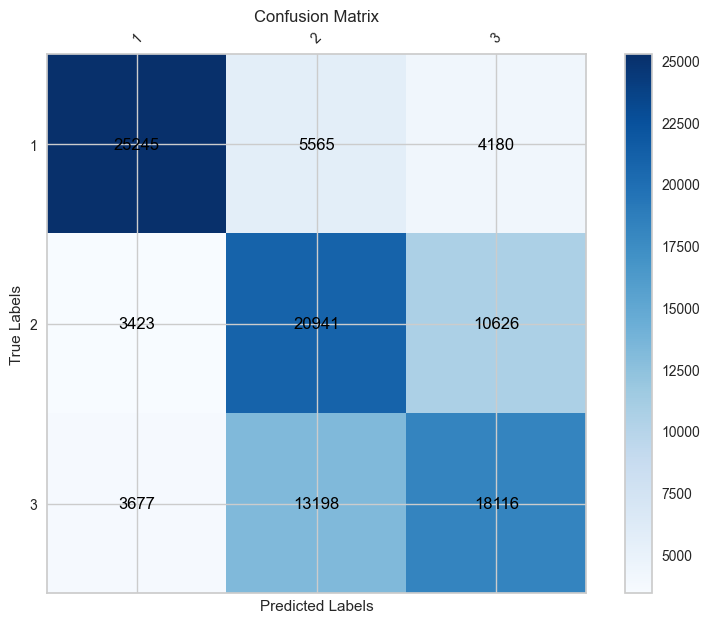

*** Classification Metrics ***
F1 Score = 0.6146836965481568
******************************


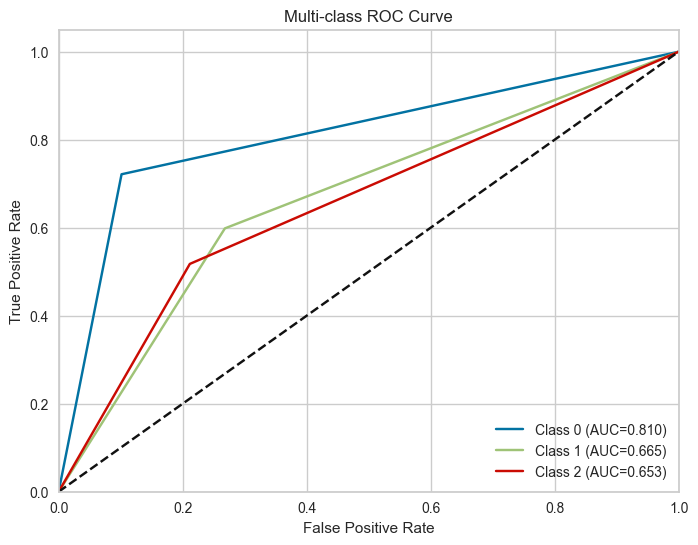

AUC scores for each class: {0: 0.8100178726501108, 1: 0.6651848250616703, 2: 0.6530791978689429}


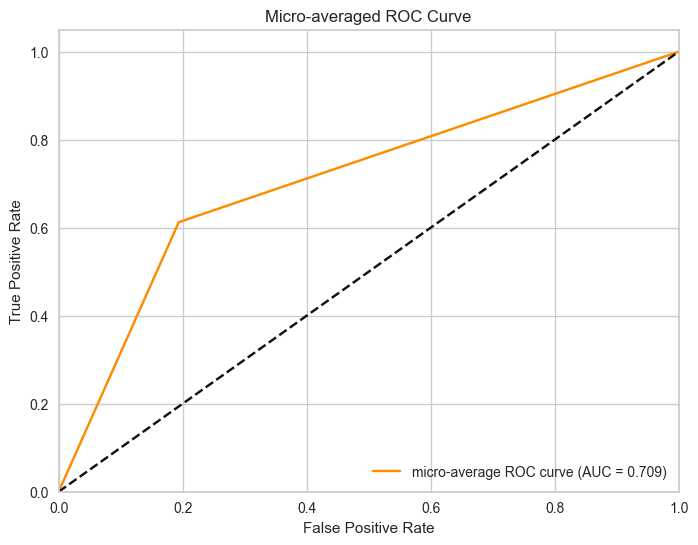

In [24]:
# Evaluate the model
print("*** Test Set Evaluation ***")
evaluate_model_multiclass(y_test, y_pred_best, knn_best.classes_)

In [ ]:
# Plot the learning curve for the best model
plot_learning_curve(knn_best, X_train_pca, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))

In [ ]:
# Plot the validation curve for the number of neighbors
param_range = np.arange(1, 21)
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train_pca, y_train, param_name='n_neighbors', param_range=param_range,
    cv=5, scoring='f1_weighted', n_jobs=-1
)

## Fusion des deux classes ancien fumeur et fumeur

### Fusion

In [23]:
df = pd.read_csv(data_path)

# Fusionner les labels 2 et 3 en un seul label 2
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].replace({3: 2})

# Sauvegarder le nouveau dataset
df.to_csv('../data/smoking_driking_dataset_Ver01_modified.csv', index=False)

In [24]:
df['SMK_stat_type_cd'].value_counts()

SMK_stat_type_cd
2.0    349902
1.0    174951
Name: count, dtype: int64

In [25]:
# Équilibrer le dataset
df_balanced = data_loader.balance_dataset('../data/smoking_driking_dataset_Ver01_modified.csv', 'SMK_stat_type_cd', '../data/balanced_smoking_drinking_dataset_modified.csv')

Distribution des classes dans le dataset équilibré :
SMK_stat_type_cd
1.0    174951
2.0    174951
Name: count, dtype: int64


### Prétraitement

In [26]:
intToFloat = ['age', 'height', 'weight']
floatToInt = ['hear_left', 'hear_right', 'urine_protein', 'SMK_stat_type_cd']

cleaning.convertType(df_balanced, intToFloat, floatToInt)

cont_features = df_balanced.select_dtypes(include=['float64']).columns
cat_features = df_balanced.select_dtypes(include=['object', 'int64']).columns
cat_features = cat_features.drop(['SMK_stat_type_cd', 'DRK_YN'])

X = df_balanced.drop(columns=['SMK_stat_type_cd', 'DRK_YN'])
y = df_balanced['SMK_stat_type_cd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_test, preprocessor = preprocess_data_without_selecting(X_train, X_test, cont_features, cat_features)

### PCA

In [27]:
pca = PCA(n_components=0.95)  # Conservation de 95% de la variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Modélisation

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

# Entraîner le modèle KNN sur les données d'entraînement transformées
knn.fit(X_train_pca, y_train)

KNeighborsClassifier()

### Evaluation

In [29]:
def evaluate_model_binary(y_true, y_pred, class_labels):
  """
  Evaluate a multi-class classification model using confusion matrix, classification metrics, 
  and ROC AUC.

  Args:
    y_true (array): True class labels.
    y_pred (array): Predicted class labels.
    class_labels (array): List of class labels.
  """
  # Plot confusion matrix
  plot_confusion_matrix(y_true, y_pred, classes=class_labels)

  # Calculate classification metrics
  # precision = precision_score(y_true, y_pred, average='weighted')
  # recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')

  # Display classification metrics
  print("*** Classification Metrics ***")
  # print("Precision =", precision)
  # print("Recall =", recall)
  print("F1 Score =", f1)
  print("******************************")

  # Binarize the output
  y_onehot_test = label_binarize(y_true, classes=class_labels)
  y_score = label_binarize(y_pred, classes=class_labels)

  # ROC AUC

  fpr, tpr, _ = roc_curve(y_onehot_test[:, 0], y_score[:, 0])
  roc_auc = auc(fpr, tpr)

  # Plot ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label='ROC curve (AUC=%0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="lower right")
  plt.show()

  # Print AUC score
  print("AUC score:", roc_auc)

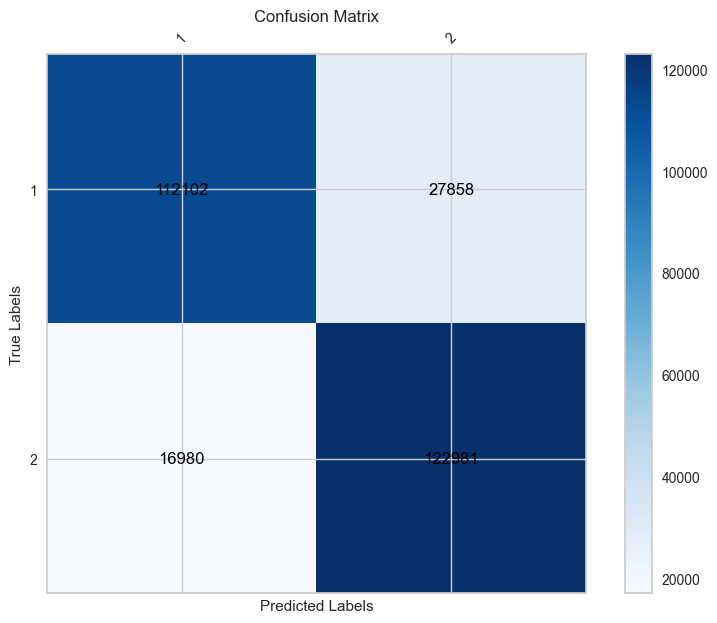

*** Classification Metrics ***
F1 Score = 0.8395768024801896
******************************


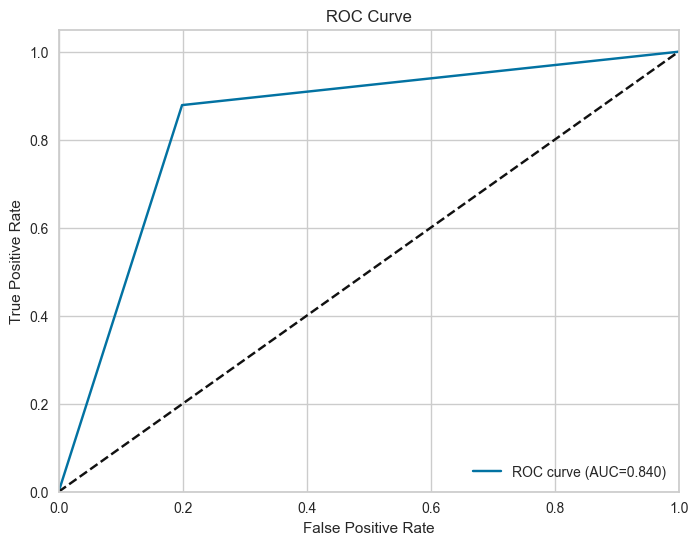

AUC score: 0.8398189529848187


In [33]:
# Faire des prédictions sur les données train
y_train_pred = knn.predict(X_train_pca)

# Évaluer le modèle sur les données train
class_labels = np.unique(y)  # Assurez-vous que les étiquettes de classe sont correctes
evaluate_model_binary(y_train, y_train_pred, class_labels)

In [30]:
# Faire des prédictions sur les données de test transformées
y_pred = knn.predict(X_test_pca)

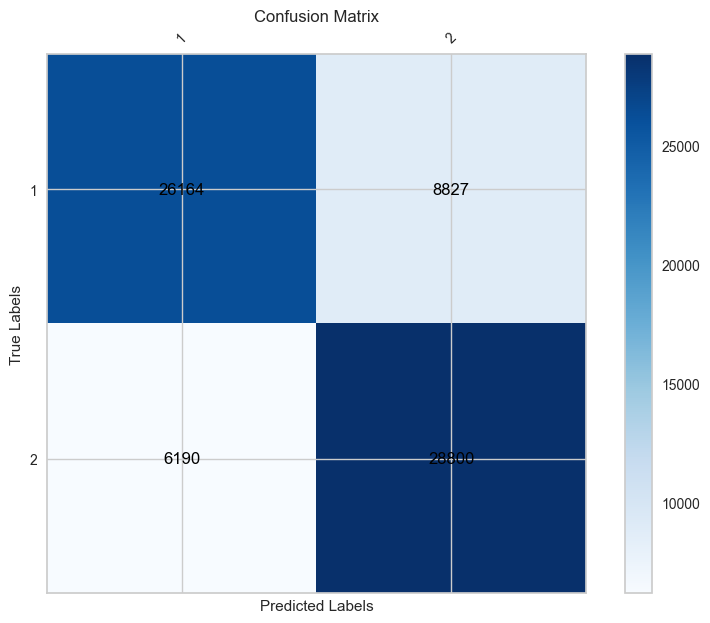

*** Classification Metrics ***
F1 Score = 0.7851081729928306
******************************


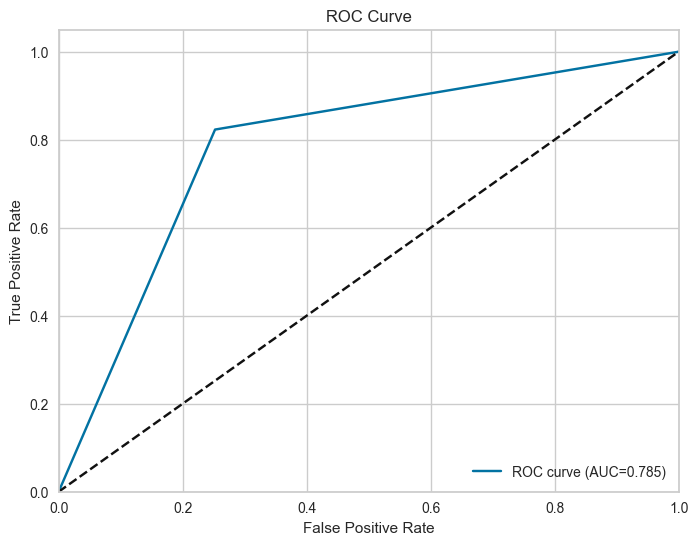

AUC score: 0.785413721990113


In [31]:
class_labels = np.unique(y)  # Assurez-vous que les étiquettes de classe sont correctes
evaluate_model_binary(y_test, y_pred, class_labels)

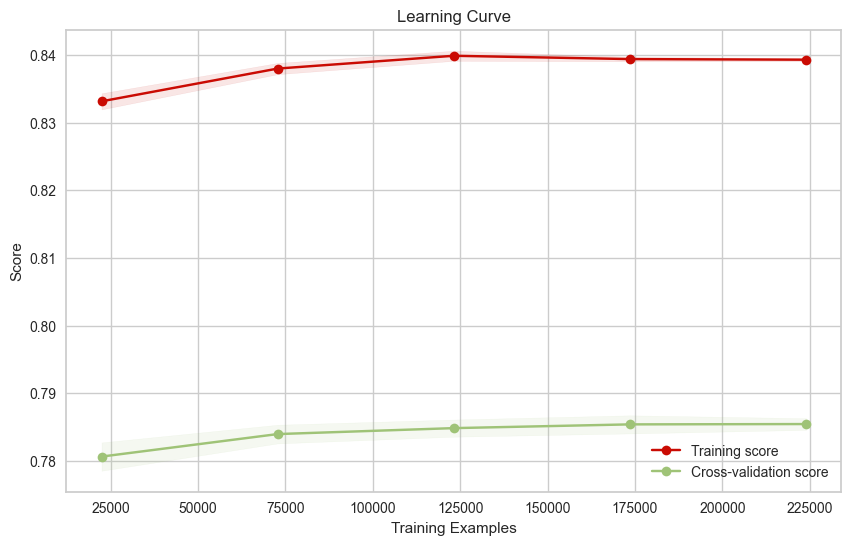

In [32]:
# plot learning curve
plot_learning_curve(knn, X_train_pca, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))